# Начало

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

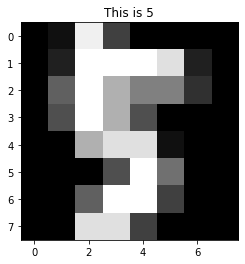

In [6]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

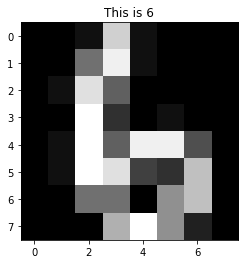

In [7]:
i = 728
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

# 1-е Задание

In [0]:
from scipy.cluster.vq import kmeans
vector_images = digits.images.reshape((digits.images.shape[0], -1))

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(dist, axis=1)

def digits_pr(k):
    centroids, eps = kmeans(vector_images, k)
    labels = get_labels(vector_images, centroids) 
   
    digit_clasters = []
    for i in range(k):
        digit_clasters.append(np.argmax(np.bincount(digits.target[labels == i])))
    
    predict_digits = np.array(list(map(digit_clasters.__getitem__, labels)))
    return predict_digits, centroids, digit_clasters

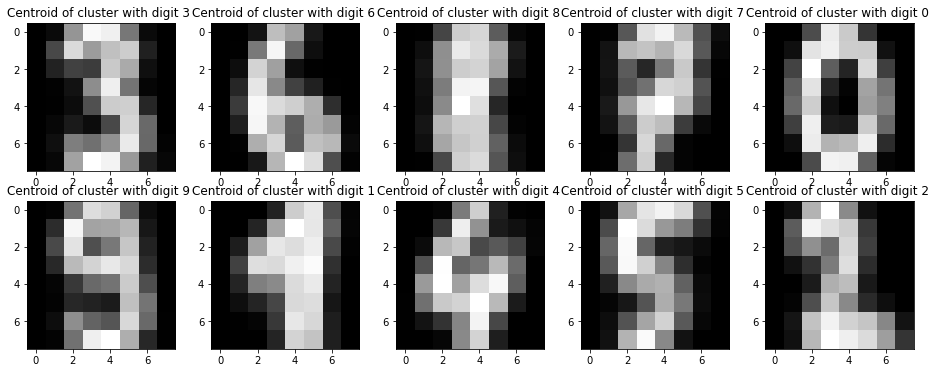

In [45]:
predict_digits, centroids, digit_clasters = digits_pr(10)

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.title('Centroid of cluster with digit {} '.format(digit_clasters[i]))
    plt.imshow(centroids[i].reshape((8,8)),cmap='gray')

# 2-е Задание

In [46]:
def error(true_digits,predict_digits):
    return np.count_nonzero(true_digits != predict_digits) / true_digits.size

print('Error for all data', error(digits.target, predict_digits))
for i in range(10):
    digit_i_mask = (digits.target == i)
    print('Digit', i, 'probability of error', error(digits.target[digit_i_mask], predict_digits[digit_i_mask]))


Error for all data 0.20756816917084028
Digit 0 probability of error 0.0056179775280898875
Digit 1 probability of error 0.6978021978021978
Digit 2 probability of error 0.1638418079096045
Digit 3 probability of error 0.1366120218579235
Digit 4 probability of error 0.09944751381215469
Digit 5 probability of error 0.25274725274725274
Digit 6 probability of error 0.022099447513812154
Digit 7 probability of error 0.05027932960893855
Digit 8 probability of error 0.41379310344827586
Digit 9 probability of error 0.23333333333333334


# 3-е Задание

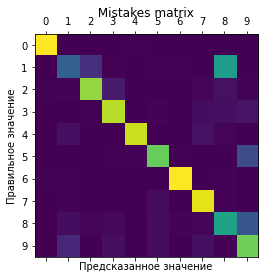

In [47]:
k = 10
def make_matrix(true_digits, predict_digits):
    matrix = np.array([ [np.count_nonzero((true_digits == i) & (predict_digits == j)) for j in range(k)] for i in range(k)])
    plt.matshow(matrix)
    plt.xticks(range(k))
    plt.yticks(range(k))
    plt.title(' Mistakes matrix ')
    plt.ylabel('Правильное значение')
    plt.xlabel('Предсказанное значение')
    plt.show()

make_matrix(digits.target,predict_digits)

Мы видим что плохо классифицируется 1,8,9. А 0, 6, 7 хорошо.

# 4-е Задание

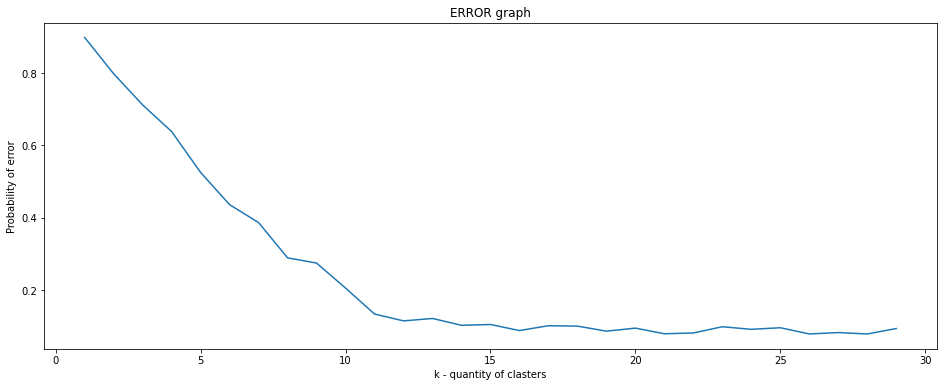

In [48]:
r = range(1, 30)
errors = [error(digits.target, digits_pr(k)[0]) for k in r]
plt.figure(figsize=(16,6))
plt.title('ERROR graph')
plt.xlabel('k - quantity of clasters')
plt.ylabel('Probability of error')
plt.plot(r, errors)

Можно увидеть, что вероятность ошибки начиная с 16  находится на уровне ниже 0.2 и дальще примерно одинаковая.

# 5-е Задание

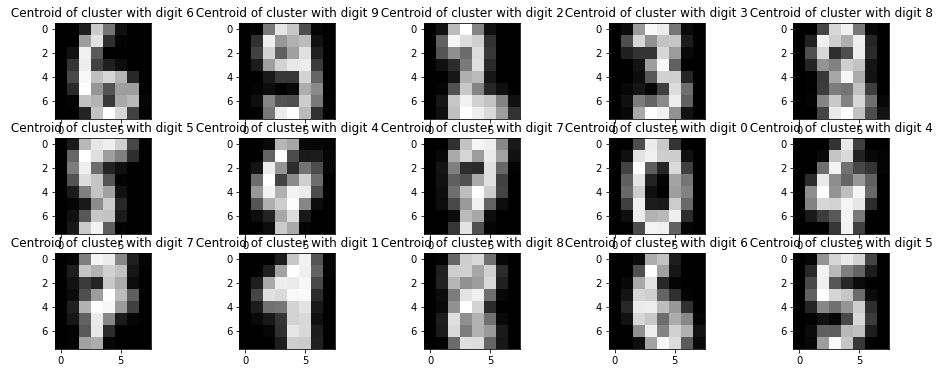

In [50]:
predict_digits, centroids, digit_clasters = digits_pr(16)
plt.figure(figsize=(16,6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.title(' Centroid of cluster with digit {} '.format(digit_clasters[i]))
    plt.imshow(centroids[i].reshape((8,8)),cmap='gray')

Для 6 2 кластера, для 9 1, для 2 1, для 3 1, для  8 2, для 5 2, для 4 2, для 7 2, для 0 1, для 1 1.

Итак 1 кластер для 9, 2, 3, 0, 1. И 2 кластера для 6, 8, 5, 4, 7.

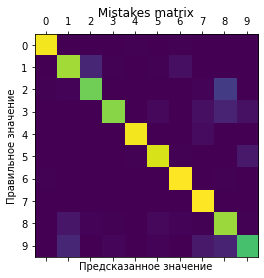

In [51]:
make_matrix(digits.target,predict_digits)

Можно увидеть что эта модель, где k = 15, более хорошо классифицирует чем, когда k = 10.